In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

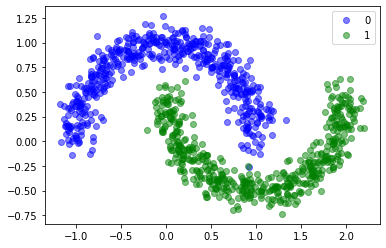

In [2]:
X, y = make_moons(n_samples = 1000, noise = 0.1, random_state = 0)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'og', alpha = 0.5)
plt.legend(['0', '1'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [4]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(2, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(learning_rate = 0.05), 'binary_crossentropy', metrics = ['accuracy'])

2022-04-27 20:24:36.823294: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 200, verbose = False)

In [6]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 796us/step - loss: 9.9965e-04 - accuracy: 1.0000


[0.000999651849269867, 1.0]

<function matplotlib.pyplot.show(close=None, block=None)>

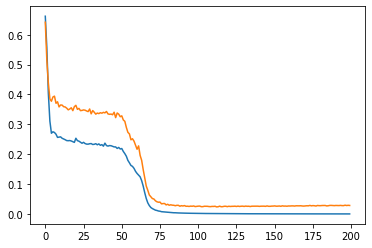

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show